# <a id='toc1_'></a>[CALIBRAGE DES VALUERS AVEC VALEURS DE TARTARUS](#toc0_)

1. **MVOTO KONGO Patrick Sorrel**, sorrel.mvoto@facsciences-uy1.cm
    * Department of Physics, Faculty of Science, University of Yaounde I 
Etudiant de Master au Laboratoire de 
    * Physique Atomique Moleculaire et Biophysique


31 JUILLET 2024

### <a id='toc1_'></a>[Utilisation de Pandas  pour extraire les information dans le fichiers my_DFT_HF_XTB_DFTD4.csv et creer un DataFrame](#toc0_)

In [7]:
import pandas as pd
from scipy.stats import pearsonr
import hvplot.pandas  
import matplotlib.pyplot as plt
import seaborn as sns

from scipy.stats import linregress


In [8]:

df= pd.read_csv('my_DFT_HF_XTB_DFTD4.csv')
df

,smiles,smiles_key,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),HOMO_dftd4(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),LUMO_dftd4(eV),GAP(eV),GAP_xtb(eV),GAP_HF(eV),GAP_DFT(eV),GAP_dftd4(eV)
0,C=O,gdb 6,-7.265440,-11.5340,-11.850312,-7.187662,-7.187658,-1.104782,-7.9133,3.992780,-0.969122,-0.969123,6.157937,3.620644,15.843092,6.218540,6.218535
1,CC=O,gdb 11,-6.911692,-11.1333,-11.408327,-6.842303,-6.842288,-0.538785,-7.2445,4.149730,-0.608858,-0.608855,6.372907,3.888878,15.558057,6.233445,6.233434
2,CC(C)=O,gdb 18,-6.615088,-10.8478,-11.069303,-6.574520,-6.574504,-0.236739,-6.7433,4.302132,-0.326638,-0.326636,6.378349,4.104570,15.371435,6.247882,6.247868
3,C#CC#C,gdb 23,-7.072239,-10.9034,-9.802031,-7.086949,-7.086949,-0.582324,-6.0201,3.460663,-0.627451,-0.627452,6.492637,4.883329,13.262694,6.459497,6.459498
4,C#CC#N,gdb 24,-8.440972,-11.9700,-11.401705,-8.436782,-8.436791,-1.477578,-7.4442,2.649821,-1.510900,-1.510953,6.963394,4.525793,14.051526,6.925882,6.925838
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,CCC(=O)C1CN1,gdb 2994,-6.955230,-10.3788,-10.394592,-6.395235,-6.395265,-0.582324,-6.8988,4.045997,-0.585714,-0.585768,6.372907,3.480012,14.440589,5.809521,5.809497
998,CCC(=O)C1CO1,gdb 2995,-6.789241,-11.0452,-11.099934,-6.679230,-6.679301,-0.680285,-7.2922,3.810473,-0.860366,-0.860406,6.108956,3.753048,14.910407,5.818864,5.818895
999,COC(=O)C1CO1,gdb 3003,-7.366122,-11.4742,-11.842167,-7.192911,-7.192938,-0.201364,-6.9236,4.107200,-0.471815,-0.471794,7.164758,4.550614,15.949367,6.721096,6.721144
1000,OCC(=O)C1CC1,gdb 3005,-6.609646,-11.2266,-11.128445,-6.900238,-6.900265,-0.209528,-7.1982,3.836980,-0.708060,-0.708104,6.400118,4.028371,14.965424,6.192178,6.192161


# CALIBRAGE AVEC LE MODEL DE TARTARUS

In [9]:
import pandas as pd

def calibrate_data(df):
    # Iterate through each row in the DataFrame
    for i in range(len(df)):
        # Extract the current row's data
        homo_tartarus = df.loc[i, "HOMO_xtb(eV)"]
        lumo_tartarus = df.loc[i, "LUMO_xtb(eV)"]

        homo_lumo_val = df.loc[i, "GAP_xtb(eV)"]
        HL_range_rest = homo_lumo_val  # Initial value of HL_range_rest

        # Determine the calibrated value of HL_range_rest based on its range
        if 0.8856 <= HL_range_rest <= 3.2627:
            HL_range_rest = 1.0
        elif HL_range_rest < 0.8856:
            HL_range_rest = 0.1144 + homo_lumo_val
        else:
            HL_range_rest = 4.2627 - HL_range_rest
        # Calculate calibrated homo and lumo levels
        homo_cal = homo_tartarus * 0.8051030400316004 + 2.5376777453204133
        lumo_cal = lumo_tartarus * 0.8787863933542347 + 3.7912767464357200
        HL_range_rest1=lumo_cal - homo_cal
        # Update the DataFrame with calibrated values
        df.loc[i,"Gap_calibrated"] = HL_range_rest1
        df.loc[i,"homo_calibrated"] = homo_cal
        df.loc[i,"lumo_calibrated"] = lumo_cal

    return df

# Assuming 'df' is your DataFrame containing the data
df1 = calibrate_data(df)

In [10]:
df1

,smiles,smiles_key,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),HOMO_dftd4(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),LUMO_dftd4(eV),GAP(eV),GAP_xtb(eV),GAP_HF(eV),GAP_DFT(eV),GAP_dftd4(eV),Gap_calibrated,homo_calibrated,lumo_calibrated
0,C=O,gdb 6,-7.265440,-11.5340,-11.850312,-7.187662,-7.187658,-1.104782,-7.9133,3.992780,-0.969122,-0.969123,6.157937,3.620644,15.843092,6.218540,6.218535,3.585557,-6.748381,-3.162824
1,CC=O,gdb 11,-6.911692,-11.1333,-11.408327,-6.842303,-6.842288,-0.538785,-7.2445,4.149730,-0.608858,-0.608855,6.372907,3.888878,15.558057,6.233445,6.233434,3.850685,-6.425776,-2.575091
2,CC(C)=O,gdb 18,-6.615088,-10.8478,-11.069303,-6.574520,-6.574504,-0.236739,-6.7433,4.302132,-0.326638,-0.326636,6.378349,4.104570,15.371435,6.247882,6.247868,4.061275,-6.195919,-2.134644
3,C#CC#C,gdb 23,-7.072239,-10.9034,-9.802031,-7.086949,-7.086949,-0.582324,-6.0201,3.460663,-0.627451,-0.627452,6.492637,4.883329,13.262694,6.459497,6.459498,4.741578,-6.240683,-1.499105
4,C#CC#N,gdb 24,-8.440972,-11.9700,-11.401705,-8.436782,-8.436791,-1.477578,-7.4442,2.649821,-1.510900,-1.510953,6.963394,4.525793,14.051526,6.925882,6.925838,4.348821,-7.099406,-2.750585
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,CCC(=O)C1CN1,gdb 2994,-6.955230,-10.3788,-10.394592,-6.395235,-6.395265,-0.582324,-6.8988,4.045997,-0.585714,-0.585768,6.372907,3.480012,14.440589,5.809521,5.809497,3.547031,-5.818326,-2.271295
998,CCC(=O)C1CO1,gdb 2995,-6.789241,-11.0452,-11.099934,-6.679230,-6.679301,-0.680285,-7.2922,3.810473,-0.860366,-0.860406,6.108956,3.753048,14.910407,5.818864,5.818895,3.737837,-6.354846,-2.617009
999,COC(=O)C1CO1,gdb 3003,-7.366122,-11.4742,-11.842167,-7.192911,-7.192938,-0.201364,-6.9236,4.107200,-0.471815,-0.471794,7.164758,4.550614,15.949367,6.721096,6.721144,4.407147,-6.700236,-2.293089
1000,OCC(=O)C1CC1,gdb 3005,-6.609646,-11.2266,-11.128445,-6.900238,-6.900265,-0.209528,-7.1982,3.836980,-0.708060,-0.708104,6.400118,4.028371,14.965424,6.192178,6.192161,3.966489,-6.500892,-2.534403


#  CORRELATION ENTRE LES VALEURS D'ENERGIES GAP OBTENUES PAR XTB-CREST  ET  CELLES DU MODELE UTILISES DANS  GDB9

Pearsons correlation: 0.8326068655545337


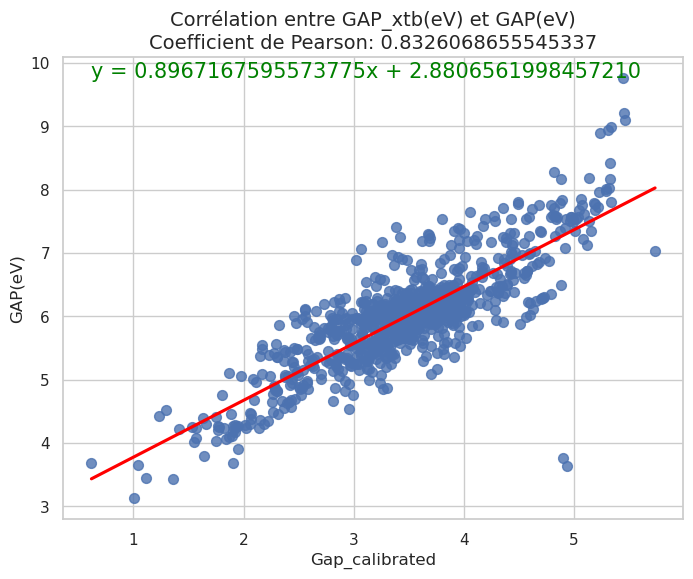

In [11]:
import seaborn as sns

# Convert dataframe into series
list1 = df1['GAP_xtb(eV)']

list2 = df1['GAP(eV)']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list1, list2)
print('Pearsons correlation: %.16f' % pearson_coef)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(list1, list2)
regress_values = list1 * slope + intercept
line_eq = f'y = {slope:.16f}x + {intercept:.16f}'

# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='GAP_xtb(eV)', y='GAP(eV)', data=df1, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre GAP_xtb(eV) et GAP(eV)\nCoefficient de Pearson: {pearson_coef:.16f}', fontsize=14)
plt.xlabel('Gap_calibrated', fontsize=12)
plt.ylabel('GAP(eV)', fontsize=12)

# Affichage de l'équation de la régression linéaire sur le graphique
plt.annotate(line_eq, (min(list1), max(list2)), fontsize=15, color="green")

# Afficher le graphique
plt.show()

#  CORRELATION ENTRE LES VALEURS D'ENERGIES GAP  OBTENUES PAR CALIBRADE DES VALEURS  XTB-CREST  ET  CELLES DU MODELE UTILISES DANS  GDB9

Pearsons correlation: 0.8270224247997680


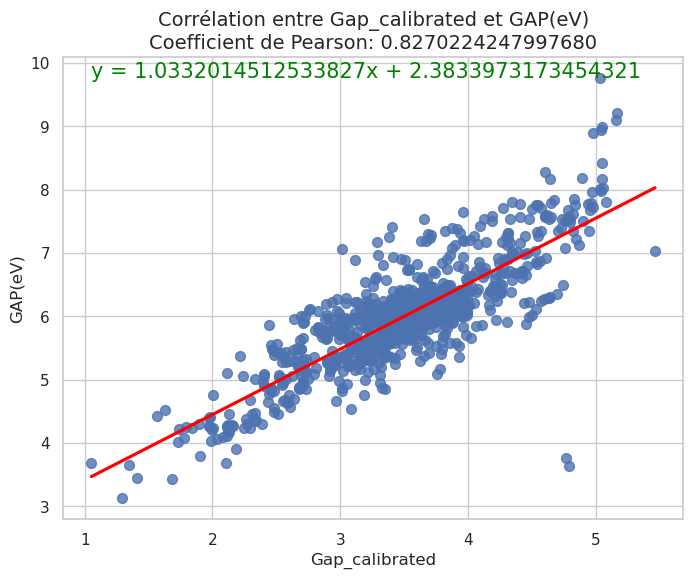

In [29]:
import seaborn as sns

# Convert dataframe into series
list1 = df1['Gap_calibrated']

list2 = df1['GAP(eV)']

# Apply the pearsonr()
pearson_coef, p_value = pearsonr(list1, list2)
print('Pearsons correlation: %.16f' % pearson_coef)

# Perform linear regression
slope, intercept, r_value, p_value, std_err = linregress(list1, list2)
regress_values = list1 * slope + intercept
line_eq = f'y = {slope:.16f}x + {intercept:.16f}'

# Tracer la corrélation avec Seaborn
sns.set(style="whitegrid")

# Création du graphique de corrélation
plt.figure(figsize=(8, 6))
sns.regplot(x='Gap_calibrated', y='GAP(eV)', data=df1, ci=None,
            scatter_kws={'s': 50}, line_kws={'color': 'red'})

# Ajout du coefficient de corrélation dans le titre
plt.title(f'Corrélation entre Gap_calibrated et GAP(eV)\nCoefficient de Pearson: {pearson_coef:.16f}', fontsize=14)
plt.xlabel('Gap_calibrated', fontsize=12)
plt.ylabel('GAP(eV)', fontsize=12)

# Affichage de l'équation de la régression linéaire sur le graphique
plt.annotate(line_eq, (min(list1), max(list2)), fontsize=15, color="green")

# Afficher le graphique
plt.show()

In [20]:
dfa=df1.iloc[0:60,:]
dfa

,smiles,smiles_key,HOMO(eV),HOMO_xtb(eV),HOMO_HF(eV),HOMO_DFT(eV),HOMO_dftd4(eV),LUMO(eV),LUMO_xtb(eV),LUMO_HF(eV),LUMO_DFT(eV),LUMO_dftd4(eV),GAP(eV),GAP_xtb(eV),GAP_HF(eV),GAP_DFT(eV),GAP_dftd4(eV),Gap_calibrated,homo_calibrated,lumo_calibrated
0,C=O,gdb 6,-7.265440,-11.5340,-11.850312,-7.187662,-7.187658,-1.104782,-7.9133,3.992780,-0.969122,-0.969123,6.157937,3.620644,15.843092,6.218540,6.218535,3.585557,-6.748381,-3.162824
1,CC=O,gdb 11,-6.911692,-11.1333,-11.408327,-6.842303,-6.842288,-0.538785,-7.2445,4.149730,-0.608858,-0.608855,6.372907,3.888878,15.558057,6.233445,6.233434,3.850685,-6.425776,-2.575091
2,CC(C)=O,gdb 18,-6.615088,-10.8478,-11.069303,-6.574520,-6.574504,-0.236739,-6.7433,4.302132,-0.326638,-0.326636,6.378349,4.104570,15.371435,6.247882,6.247868,4.061275,-6.195919,-2.134644
3,C#CC#C,gdb 23,-7.072239,-10.9034,-9.802031,-7.086949,-7.086949,-0.582324,-6.0201,3.460663,-0.627451,-0.627452,6.492637,4.883329,13.262694,6.459497,6.459498,4.741578,-6.240683,-1.499105
4,C#CC#N,gdb 24,-8.440972,-11.9700,-11.401705,-8.436782,-8.436791,-1.477578,-7.4442,2.649821,-1.510900,-1.510953,6.963394,4.525793,14.051526,6.925882,6.925838,4.348821,-7.099406,-2.750585
5,N#CC#N,gdb 25,-10.057328,-12.7213,-13.304096,-10.041744,-10.041746,-2.519774,-8.9206,1.701188,-2.562893,-2.562895,7.537554,3.800714,15.005285,7.478851,7.478850,3.656254,-7.704280,-4.048025
6,O=CC#C,gdb 26,-7.556602,-11.4183,-11.386096,-7.441941,-7.441893,-2.000037,-8.1828,2.274850,-2.029876,-2.029867,5.556565,3.235536,13.660946,5.412066,5.412026,3.255574,-6.655230,-3.399657
7,O=CC#N,gdb 27,-8.615125,-12.1153,-13.445938,-8.450145,-8.450134,-2.993252,-9.4681,1.286393,-3.111708,-3.111714,5.621872,2.647216,14.732330,5.338437,5.338420,2.687226,-7.216387,-4.529161
8,O=CC=O,gdb 28,-7.259998,-11.5923,-11.985126,-7.359385,-7.359383,-3.028627,-9.7705,1.370885,-3.169612,-3.169613,4.231371,1.821790,13.356011,4.189773,4.189771,2.000413,-6.795318,-4.794906
9,CCC=O,gdb 35,-6.802847,-11.0118,-11.282662,-6.823856,-6.823836,-0.557833,-7.1207,4.176279,-0.592295,-0.592291,6.245013,3.891076,15.458941,6.231562,6.231545,3.861658,-6.327956,-2.466298


# COURBE DE VARIATION DES DIFFERENTES  ENERGIES GAP ET LEURS DIFFERENCES

/tmp/ipykernel_12475/1380709323.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['diff_GAP'] = dfa['GAP(eV)'] - dfa['GAP_xtb(eV)']


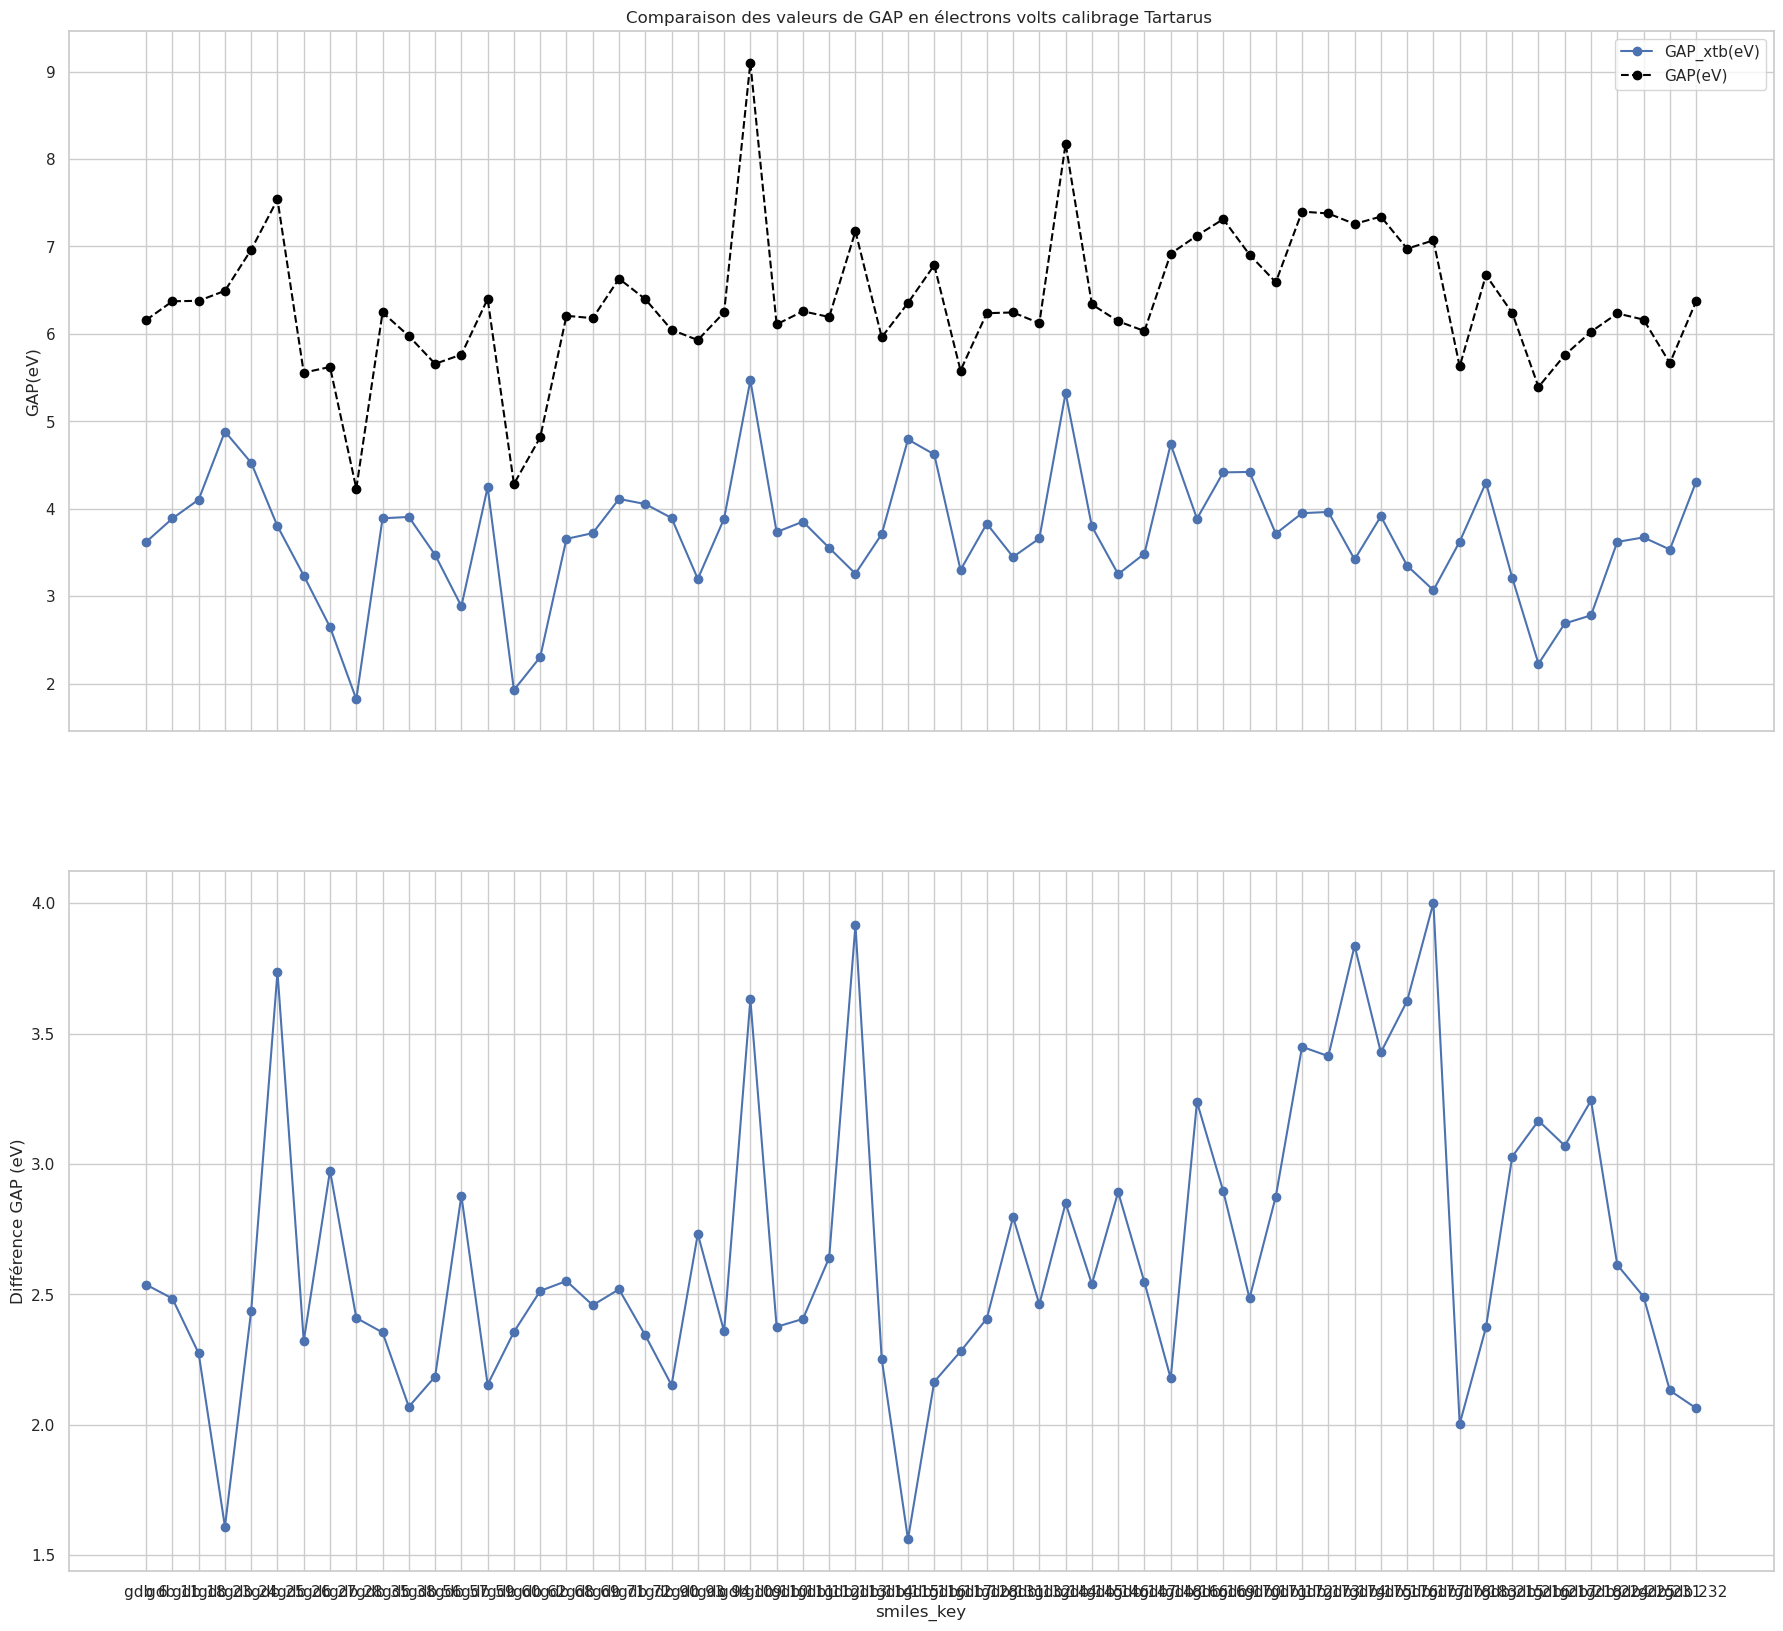

In [27]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode
dfa['diff_GAP'] = dfa['GAP(eV)'] - dfa['GAP_xtb(eV)']
# df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']
# df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']
# df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)

methods = ['xtb']
gap_cols = [f'Gap_calibrated' for method in methods]
diff_cols = [f'diff_GAP_{method}' for method in methods]

# GAP Comparaison
for method in methods:
    ax[0].plot(dfa['smiles_key'], dfa[f'GAP_xtb(eV)'], marker='o', label=f'GAP_xtb(eV)')
ax[0].plot(dfa['smiles_key'], dfa['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP(eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts calibrage Tartarus ')
ax[0].grid(True)
ax[0].legend()

/
# Différence GAP
for method in methods:
    ax[1].plot(dfa['smiles_key'], dfa['diff_GAP'], marker='o', label='diff_GAP')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_12475/3129208112.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['diff_GAP'] = dfa['GAP_xtb(eV)'] - dfa['Gap_calibrated']


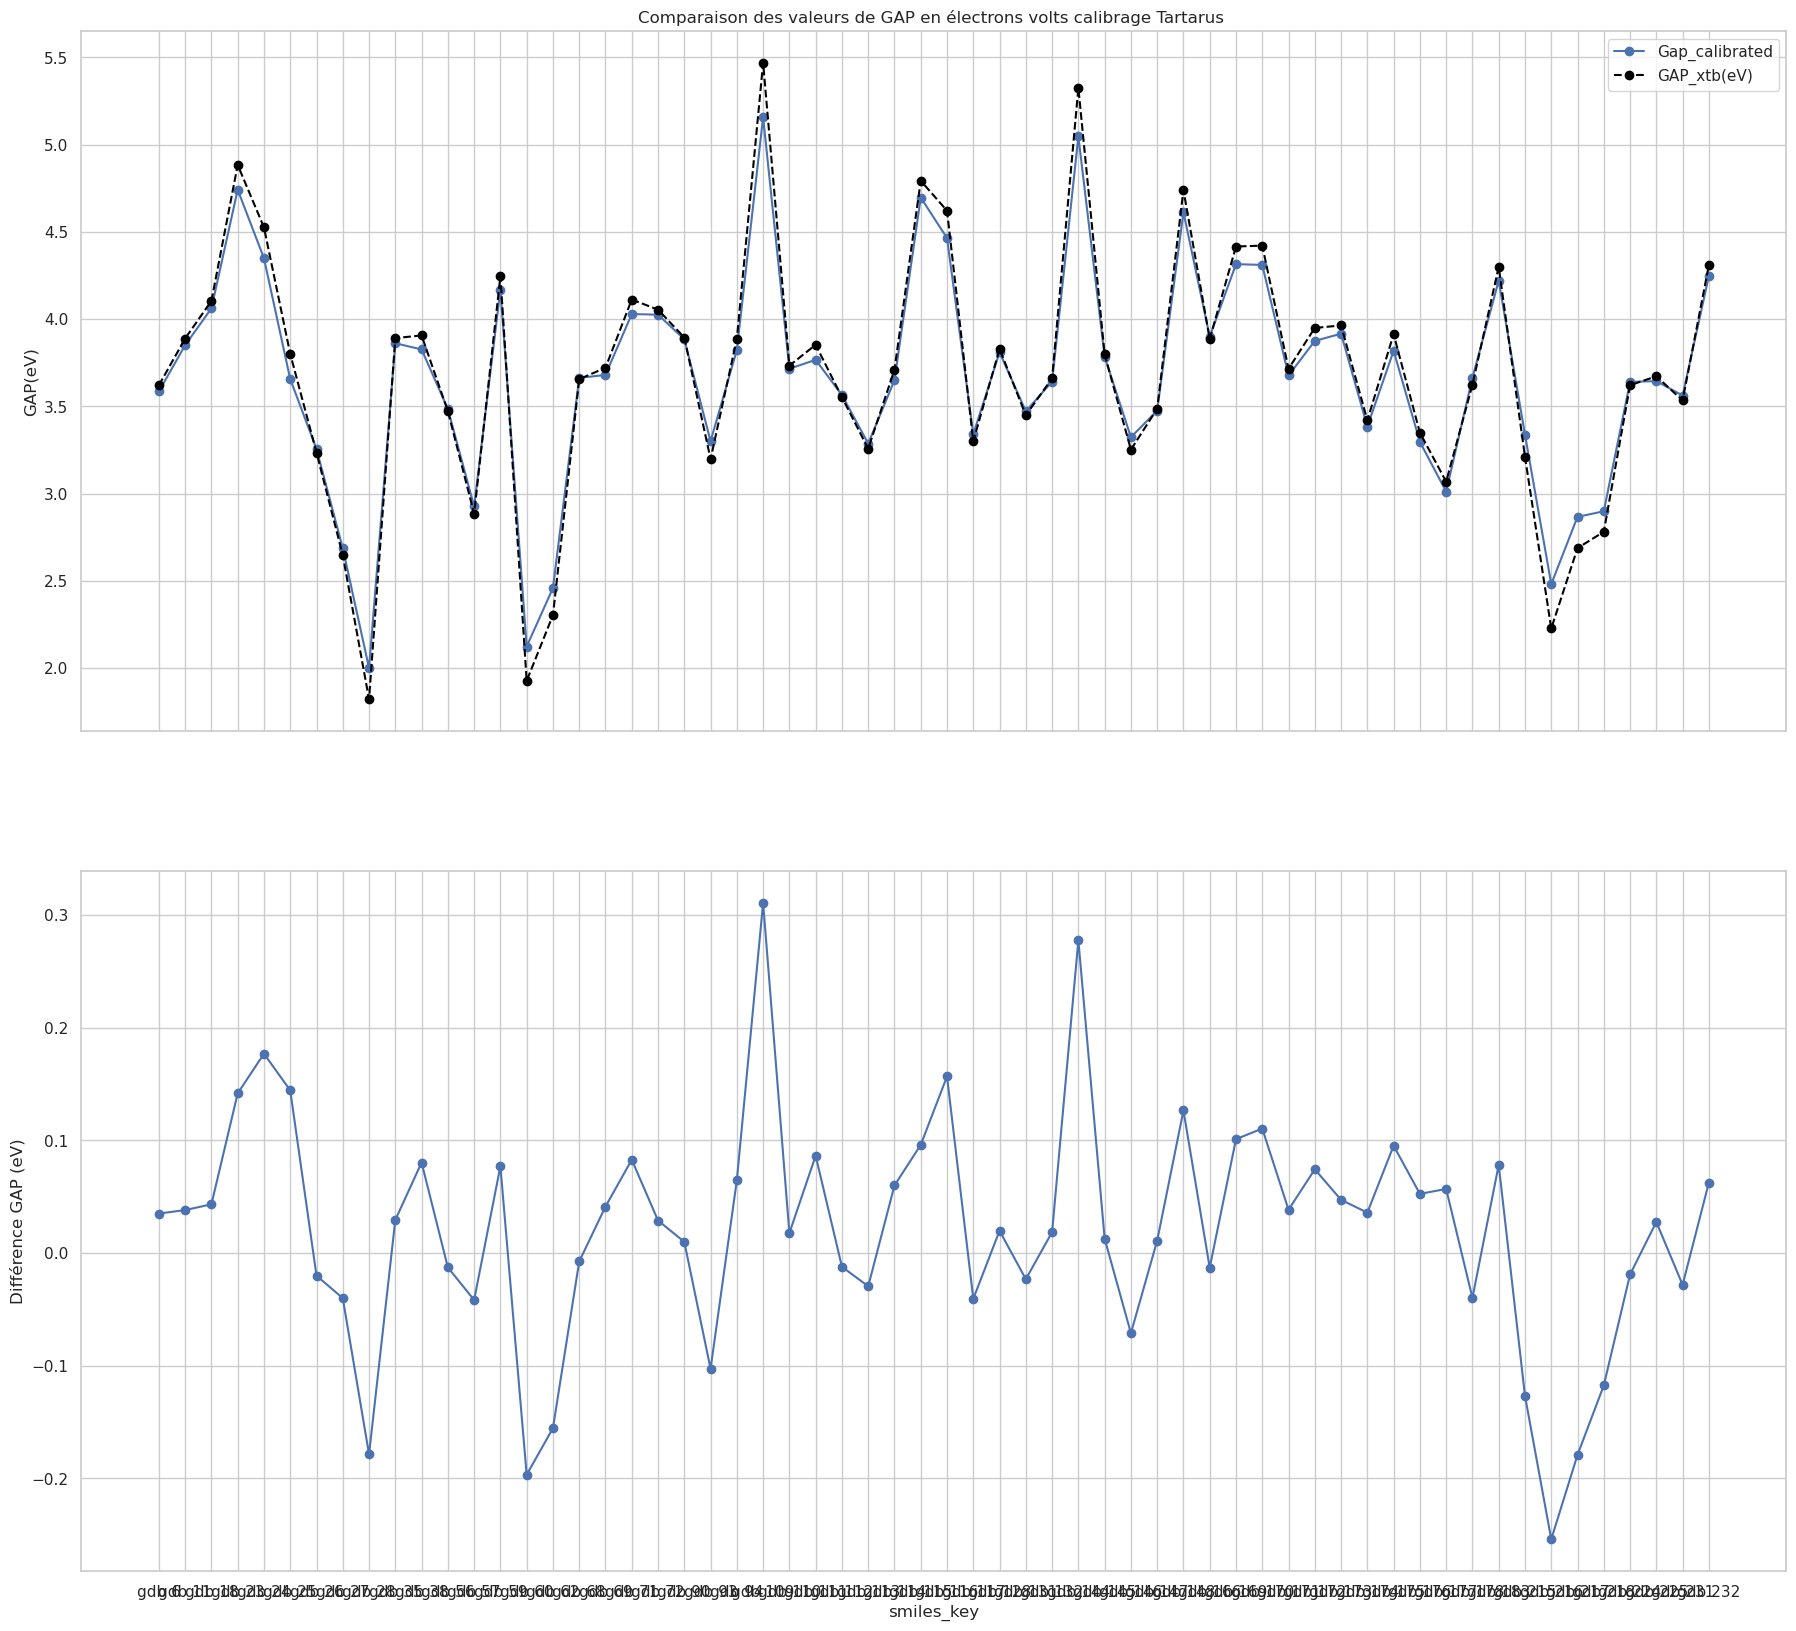

In [26]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode
dfa['diff_GAP'] = dfa['GAP_xtb(eV)'] - dfa['Gap_calibrated']
# df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']
# df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']
# df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)



# GAP Comparaison

ax[0].plot(dfa['smiles_key'], dfa[f'Gap_calibrated'], marker='o', label=f'Gap_calibrated')
ax[0].plot(dfa['smiles_key'], dfa['GAP_xtb(eV)'], marker='o', label='GAP_xtb(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP(eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts calibrage Tartarus ')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(dfa['smiles_key'], dfa['diff_GAP'], marker='o', label='diff_GAP')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

/tmp/ipykernel_12475/2738392714.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dfa['diff_GAP'] = dfa['GAP(eV)'] - dfa['Gap_calibrated']


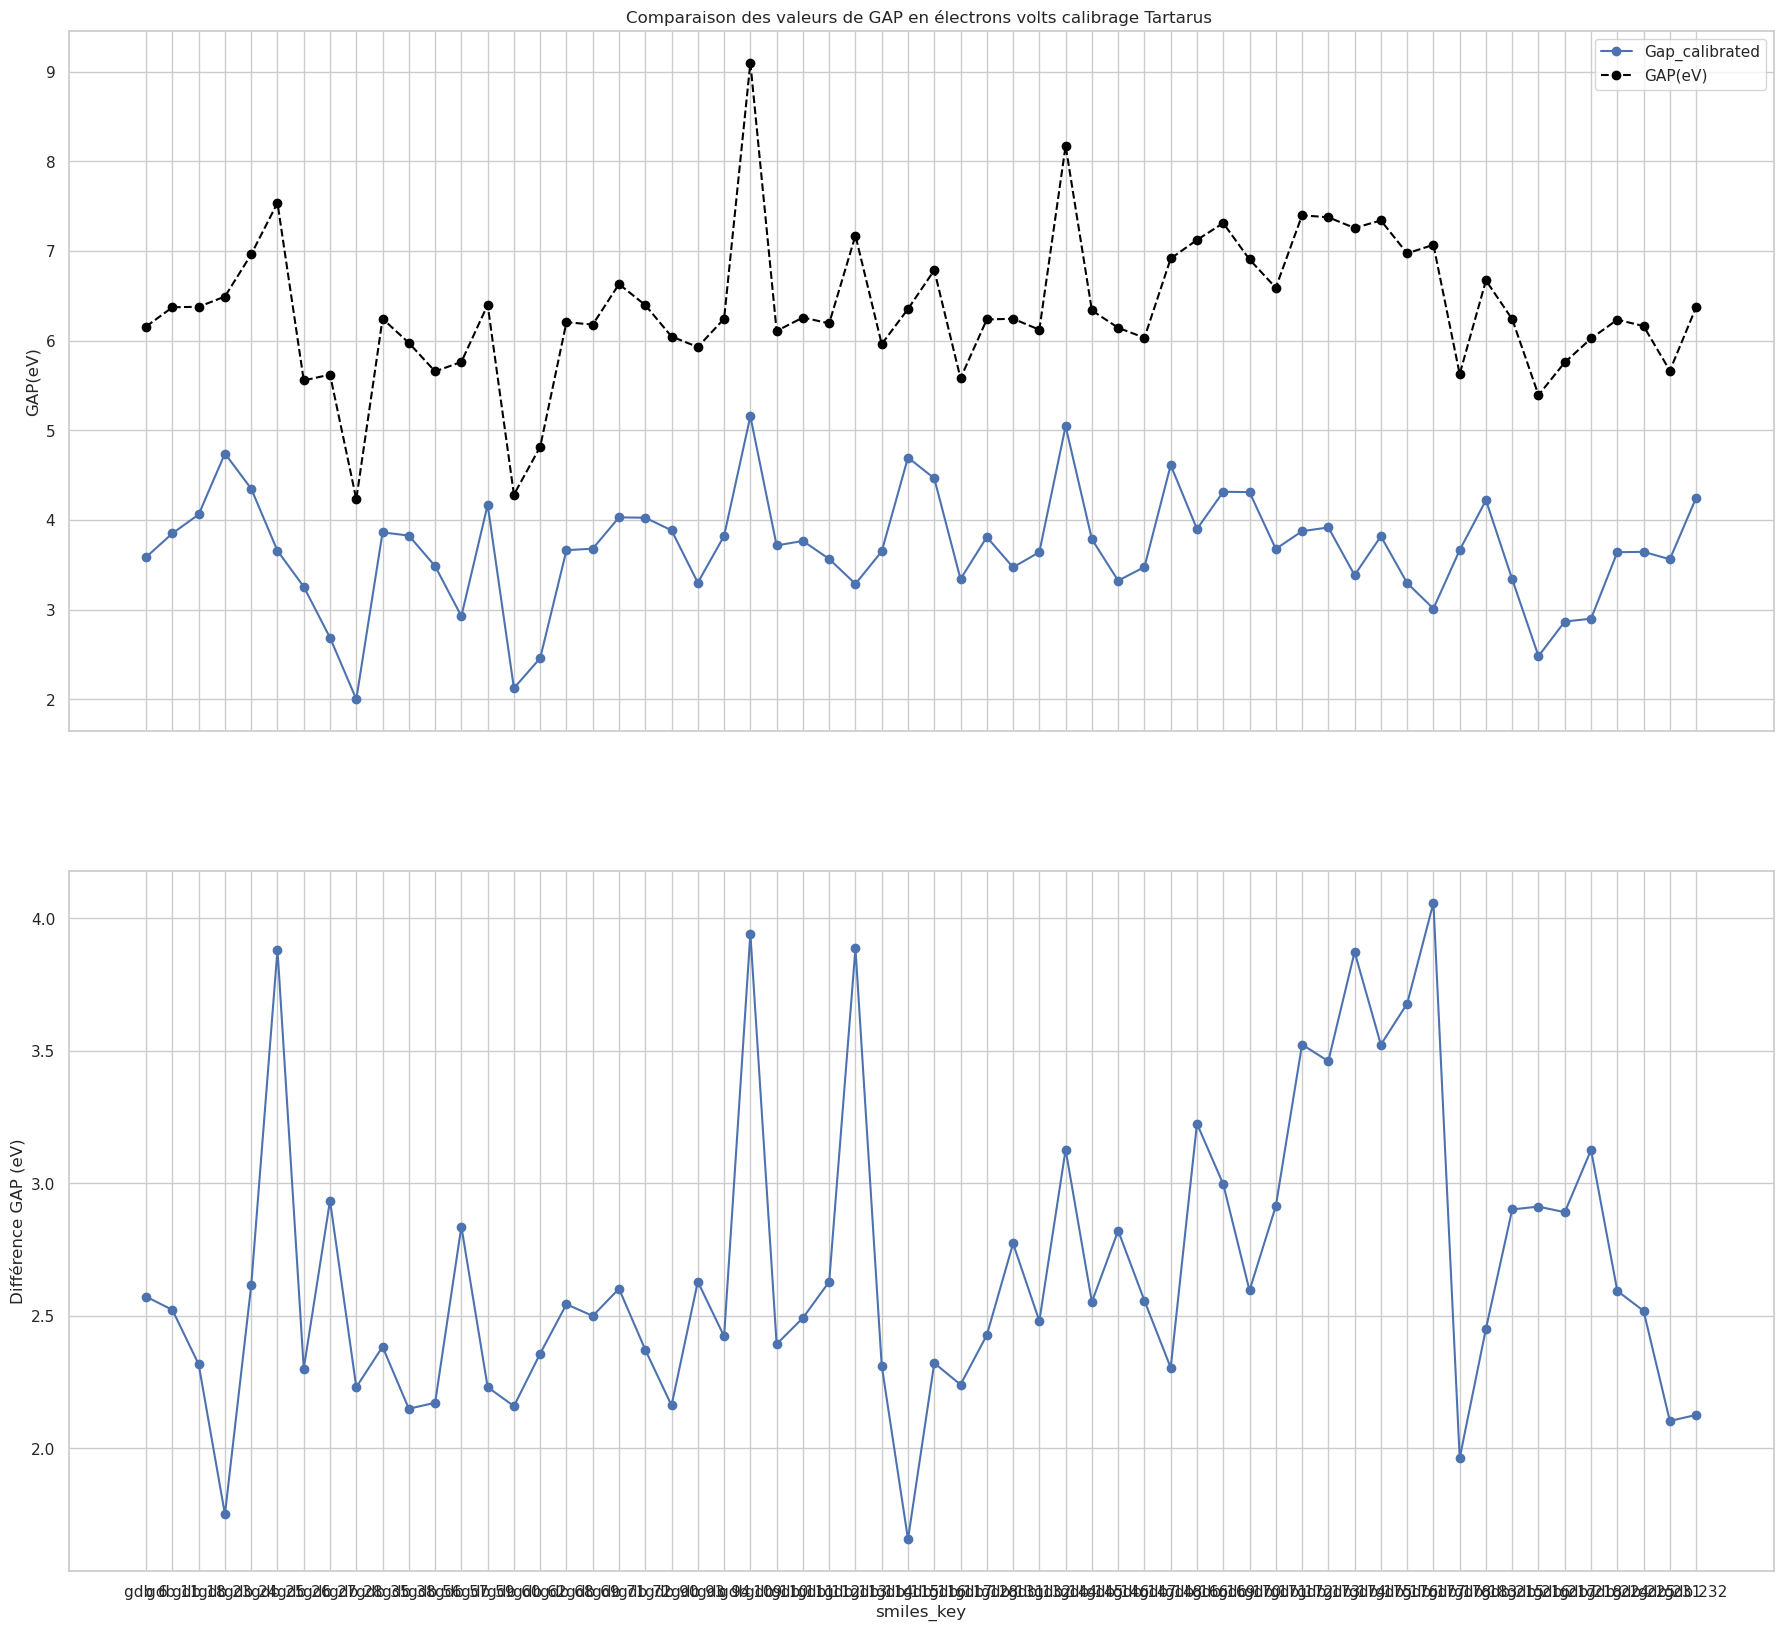

In [28]:
# Calculer la différence entre GAP non calibré et calibré pour chaque méthode
dfa['diff_GAP'] = dfa['GAP(eV)'] - dfa['Gap_calibrated']
# df['diff_HOMO_HF'] = df['HOMO(eV)'] - df['HOMO_HF_calibrated']
# df['diff_HOMO_DFT'] = df['HOMO(eV)'] - df['HOMO_DFT_calibrated']
# df['diff_HOMO_dftd4'] = df['HOMO(eV)'] - df['HOMO_dftd4_calibrated']

# Tracer les graphiques
fig, ax = plt.subplots(2, 1, figsize=(22, 20), sharex=True)



# GAP Comparaison

ax[0].plot(dfa['smiles_key'], dfa[f'Gap_calibrated'], marker='o', label=f'Gap_calibrated')
ax[0].plot(dfa['smiles_key'], dfa['GAP(eV)'], marker='o', label='GAP(eV)', linestyle='--', color='black')
ax[0].set_ylabel('GAP(eV)')
ax[0].set_title('Comparaison des valeurs de GAP en électrons volts calibrage Tartarus ')
ax[0].grid(True)
ax[0].legend()
ax[1].plot(dfa['smiles_key'], dfa['diff_GAP'], marker='o', label='diff_GAP')
ax[1].set_ylabel('Différence GAP (eV)')
ax[1].set_xlabel('smiles_key')
ax[1].grid(True)

# Au vue des resultats 

## Le calibrage avec les valeurs de tartarus n'est pas appropriés pour la base gdb 9